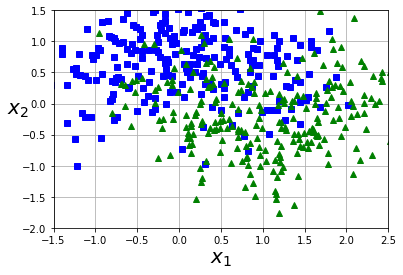

In [21]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,f1_score,mean_squared_error


X, y = make_moons(n_samples=500, noise=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -2, 1.5])
plt.show()

In [23]:
C = 1.0
poly_svc = svm.SVC(kernel='poly', degree=5, C=C).fit(X_train, y_train)
c = poly_svc.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test,c))
print('Accuracy Score: %.3f' %  accuracy_score(y_test, c))
print('ROC AUC Score: %.3f' %  roc_auc_score(y_test, c))
print('MeanSquareError: %.3f' %  mean_squared_error(y_test, c))

Confusion Matrix
[[42  1]
 [30 27]]
Accuracy Score: 0.690
ROC_AUC Score: 0.725
Mean Square Error: 0.310


Radial Basis Function(rbf) kernel is one of the most preferred and used kernel functions in svm. As it is usually chosen for non-linear data. And the rbf kernel helps to make proper seperation when there is no prior knowledge of data. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors. To increase the performance of the model than the svm model with polynomial kernel. As it is more generalized representation of the linear kernel, And it is not as preferred as other kernel functions due to less efficient and accurate nature of the model. Gamma is the parameter of a Gaussian Kernel (to handle non-linear classification).

# rbf helps to proper seperation and with the as the behavior of the model is very sensitive to the gamma parameter. The radius of the RBF kernel alone acts as a good structural regularizer. Increasing C further doesn’t help, since very high C values typically increase fitting time. Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close. So by changing the kernel it increases the accuracy of the model.

In [25]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
b = rbf_svc.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test,b))
print('Accuracy Score: %.3f' %  accuracy_score(y_test, b))
print('ROC AUC Score: %.3f' %  roc_auc_score(y_test, b))
print('MeanSquareError: %.3f' %  mean_squared_error(y_test,b))

Confusion Matrix
[[38  5]
 [19 38]]
Accuracy Score: 0.760
ROC_AUC Score: 0.775
Mean Square Error: 0.240


Linear Kernel is the basic type of kernel and it is one-dimensional in nature.linear kernel functions are faster than other functions. As linear kernel creates a boundry around the corners. It proves to be best when there are lot of features and classification that can be linearly seperatable. 

# And by using Linear for the above SVM classifier it is more faster and we can see that the accurancy and ROC curve of the model increased.

In [29]:
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
a = svc.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test,a))
print('Accuracy Score: %.3f' %  accuracy_score(y_test, a))
print('ROC AUC Score: %.3f' %  roc_auc_score(y_test, a))
print('MeanSquareError: %.3f' %  mean_squared_error(y_test,a))

Confusion Matrix
[[40  3]
 [15 42]]
Accuracy Score: 0.820
ROC AUC Score: 0.834
MeanSquareError: 0.180


# We can see that the second kernel i.e the rbf kernel and the ensemble model has same amount of errors. But, As we did some hyperparameter tunning we could see that SVM performs better than ensemble.

In [30]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train,y_train)
r = rnd_clf.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test,r))
print('Accuracy Score: %.3f' %  accuracy_score(y_test, r))
print('ROC AUC Score: %.3f' %  roc_auc_score(y_test, r))
print('MeanSquareError: %.3f' %  mean_squared_error(y_test,r))

Confusion Matrix
[[39  4]
 [20 37]]
Accuracy Score: 0.760
ROC_AUC Score: 0.778
Mean Square Error: 0.240
